In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

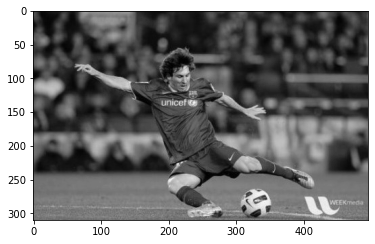

In [12]:
I = cv2.imread('MHlpW.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I,cmap='gray')
I=I.astype(float)
nf,nc=I.shape

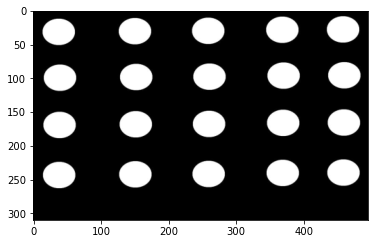

In [13]:
u = cv2.imread('region_inicial.jpg')
u = cv2.cvtColor(u, cv2.COLOR_BGR2GRAY)
u= cv2.resize(u, [nc,nf], interpolation = cv2.INTER_AREA)
plt.imshow(u,cmap='gray')
u=u.astype(float)
u=u/255-0.5

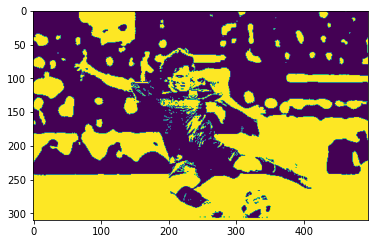

In [17]:
ep=0.1
dt=0.5
a=0.9
lambda1=0.5
lambda2=0.5

for ite in range(100):
    ci1=np.mean(I[u>=0])
    co1=np.mean(I[u<0])
    delta= ep/(np.pi* (ep**2 + u**2))
    uy,ux=np.gradient(u)
    uxy,uxx=np.gradient(ux)
    uyy,_=np.gradient(uy)
    numerador=(uxx*(uy**2)) - 2*ux*uy*uxy + uyy*(ux**2) 
    denominador= ((ux**2+uy**2))**(3/2) +a 
    u=u + dt* delta* (  (numerador/denominador)-(lambda1*( (I-ci1)**2 )) + (lambda2* (I-co1) **2))
plt.imshow(u<0)